<a href="https://colab.research.google.com/github/Dhairya2412/EDA_DA_21BDS0321/blob/main/EDA_DA_1_21BDS0321.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
#Import the Data set.
path = "/content/drive/MyDrive/Dataset_EDA/indo_rct.csv"

In [ ]:
#Read the Data Set
df = pd.read_csv(path)
df.head()

,rownames,id,site,age,risk,gender,outcome,sod,pep,recpanc,...,sodsom,bsphinc,bstent,chole,pbmal,train,status,type,rx,bleed
0,1,1001,1_UM,26,2.0,1_female,1_yes,1_yes,0_no,1_yes,...,0_no,0_no,0_no,0_no,0_no,1_yes,1_outpatient,1_type 1,1_indomethacin,NaN
1,2,1002,1_UM,24,1.0,2_male,0_no,0_no,1_yes,0_no,...,0_no,1_yes,1_yes,1_yes,0_no,0_no,1_outpatient,0_no SOD,0_placebo,NaN
2,3,1003,1_UM,57,1.0,1_female,0_no,1_yes,0_no,0_no,...,0_no,0_no,0_no,0_no,0_no,0_no,1_outpatient,2_type 2,0_placebo,NaN
3,4,1004,1_UM,29,2.0,1_female,1_yes,1_yes,0_no,0_no,...,0_no,1_yes,0_no,1_yes,0_no,1_yes,1_outpatient,1_type 1,0_placebo,NaN
4,5,1005,1_UM,38,3.5,1_female,0_no,1_yes,1_yes,0_no,...,1_yes,1_yes,0_no,0_no,0_no,1_yes,0_inpatient,1_type 1,1_indomethacin,NaN


In [ ]:
#Performing data deduplication

df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
597,False
598,False
599,False
600,False


In [ ]:
# Now, we can drop these duplicates using the drop_duplicates() method:
print(df.shape)
df1 = df.drop_duplicates()
print(df1)
print("Shape Of Data Set After Dropping Duplicates:")
print(df1.shape)

(602, 34)
     rownames    id    site  age  risk    gender outcome    sod    pep  \
0           1  1001    1_UM   26   2.0  1_female   1_yes  1_yes   0_no   
1           2  1002    1_UM   24   1.0    2_male    0_no   0_no  1_yes   
2           3  1003    1_UM   57   1.0  1_female    0_no  1_yes   0_no   
3           4  1004    1_UM   29   2.0  1_female   1_yes  1_yes   0_no   
4           5  1005    1_UM   38   3.5  1_female    0_no  1_yes  1_yes   
..        ...   ...     ...  ...   ...       ...     ...    ...    ...   
597       598  3021    3_UK   39   2.0  1_female    0_no   0_no   0_no   
598       599  3022    3_UK   50   2.5  1_female    0_no  1_yes   0_no   
599       600  4001  4_Case   29   1.5  1_female    0_no   0_no   0_no   
600       601  4002  4_Case   40   1.5  1_female    0_no  1_yes   0_no   
601       602  4003  4_Case   73   2.0  1_female    0_no   0_no   0_no   

    recpanc  ... sodsom bsphinc bstent  chole pbmal  train        status  \
0     1_yes  ...   0_no  

In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()

# Drop duplicate rows
data_deduplicated = df.drop_duplicates()
print(f"Number of duplicates removed: {duplicates}")


Number of duplicates removed: 0


In [ ]:
# Discretizing age into bins
bins = [0, 30, 50, 100]
labels = ['Young', 'Middle-aged', 'Senior']
data_deduplicated['age_group'] = pd.cut(data_deduplicated['age'], bins=bins, labels=labels)

# View the new column with binned age groups
data_deduplicated[['age', 'age_group']].head()


,age,age_group
0,26,Young
1,24,Young
2,57,Senior
3,29,Young
4,38,Middle-aged


In [ ]:
# Checking for missing data
missing_data = data_deduplicated.isnull().sum()
print(missing_data)
# Fill missing numerical data with mean
data_deduplicated.fillna(data_deduplicated.mean(numeric_only=True), inplace=True)
print(data_deduplicated)
# Fill missing categorical data with mode
for column in data_deduplicated.select_dtypes(include=['object']).columns:
    data_deduplicated[column].fillna(data_deduplicated[column].mode()[0], inplace=True)

# Check missing data after filling
data_deduplicated.isnull().sum()


rownames         0
id               0
site             0
age              0
risk             0
gender           0
outcome          0
sod              0
pep              0
recpanc          0
psphinc          0
precut           0
difcan           0
pneudil          0
amp              0
paninj           0
acinar           0
brush            0
asa81            0
asa325           0
asa              0
prophystent      0
therastent       0
pdstent          0
sodsom           0
bsphinc          0
bstent           0
chole            0
pbmal            0
train            0
status           0
type             0
rx               0
bleed          575
age_group        0
dtype: int64
     rownames    id    site  age  risk    gender outcome    sod    pep  \
0           1  1001    1_UM   26   2.0  1_female   1_yes  1_yes   0_no   
1           2  1002    1_UM   24   1.0    2_male    0_no   0_no  1_yes   
2           3  1003    1_UM   57   1.0  1_female    0_no  1_yes   0_no   
3           4  1004    1_U

,0
rownames,0
id,0
site,0
age,0
risk,0
gender,0
outcome,0
sod,0
pep,0
recpanc,0


In [ ]:
# Check the data types of each column
df.dtypes

,0
rownames,int64
id,int64
site,object
age,int64
risk,float64
gender,object
outcome,object
sod,object
pep,object
recpanc,object


In [ ]:
# Convert object columns to either int or float where possible
# First, let's attempt to convert the object columns into numerical types (int or float)
df_converted = df.copy()

# Loop through object columns to convert them
for col in df.select_dtypes(include=['object']).columns:
    # Try converting to numeric
    df_converted[col] = pd.to_numeric(df_converted[col], errors='coerce')

# Check the data types after conversion
df_converted.dtypes


,0
rownames,int64
id,int64
site,float64
age,int64
risk,float64
gender,float64
outcome,float64
sod,float64
pep,float64
recpanc,float64


In [ ]:
# Find the descriptive Statistics of the entire dataset
print(df_converted.describe())

         rownames           id  site         age        risk  gender  outcome  \
count  602.000000   602.000000   0.0  602.000000  602.000000     0.0      0.0   
mean   301.500000  1939.425249   NaN   45.269103    2.381229     NaN      NaN   
std    173.926709   568.733133   NaN   13.297968    0.881269     NaN      NaN   
min      1.000000  1001.000000   NaN   19.000000    1.000000     NaN      NaN   
25%    151.250000  1152.250000   NaN   35.000000    1.500000     NaN      NaN   
50%    301.500000  2137.500000   NaN   45.000000    2.500000     NaN      NaN   
75%    451.750000  2288.750000   NaN   54.000000    3.000000     NaN      NaN   
max    602.000000  4003.000000   NaN   90.000000    5.500000     NaN      NaN   

       sod  pep  recpanc  ...  sodsom  bsphinc  bstent  chole  pbmal  train  \
count  0.0  0.0      0.0  ...     0.0      0.0     0.0    0.0    0.0    0.0   
mean   NaN  NaN      NaN  ...     NaN      NaN     NaN    NaN    NaN    NaN   
std    NaN  NaN      NaN  ...    

In [ ]:
# Univariate analysis - Summary statistics for age
univariate_age = df_converted['age'].describe()
print(univariate_age)

count    602.000000
mean      45.269103
std       13.297968
min       19.000000
25%       35.000000
50%       45.000000
75%       54.000000
max       90.000000
Name: age, dtype: float64


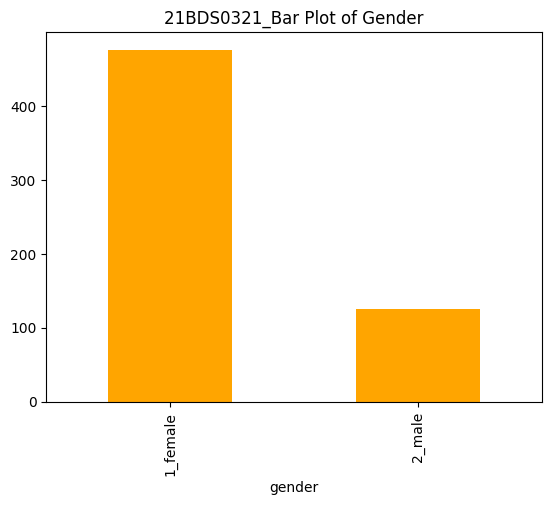

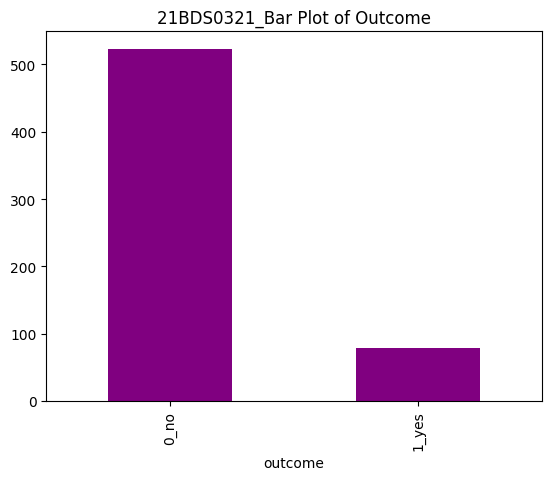

In [ ]:
# Bar plot for the gender column
data_deduplicated['gender'].value_counts().plot(kind='bar', color='orange')
plt.title('21BDS0321_Bar Plot of Gender')
plt.show()

# Bar plot for the outcome column
data_deduplicated['outcome'].value_counts().plot(kind='bar', color='purple')
plt.title('21BDS0321_Bar Plot of Outcome')
plt.show()


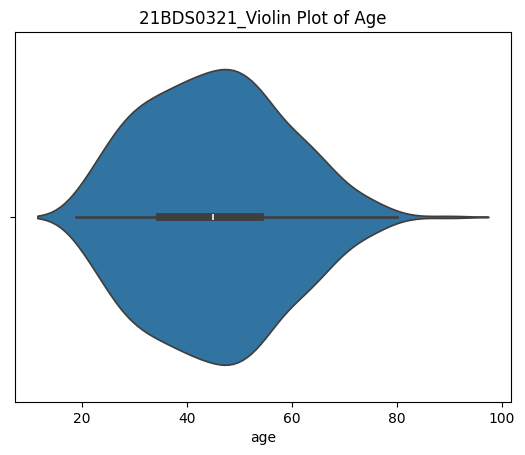

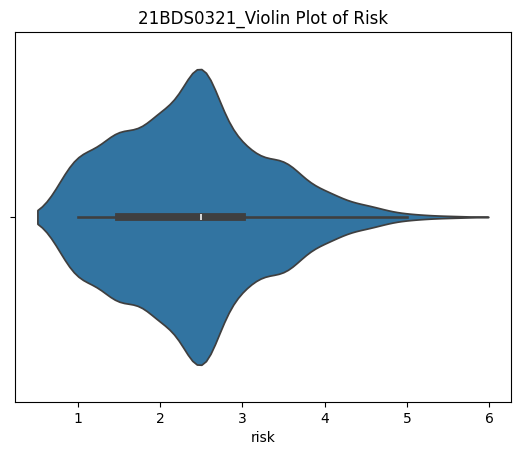

In [ ]:

# Violin plot for the age column
sns.violinplot(data=df_converted, x='age')
plt.title('21BDS0321_Violin Plot of Age')
plt.show()

# Violin plot for the risk column
sns.violinplot(data=df_converted, x='risk')
plt.title('21BDS0321_Violin Plot of Risk')
plt.show()


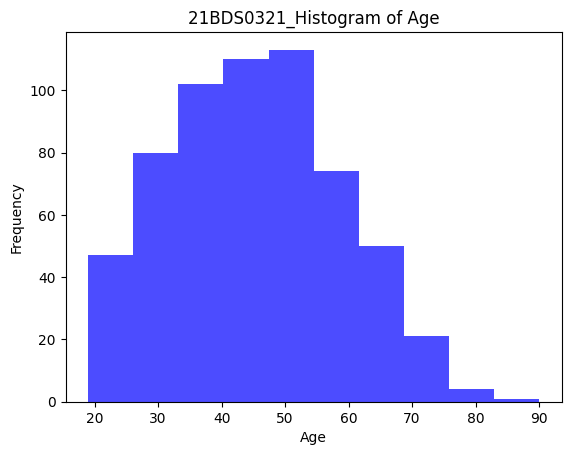

In [ ]:
# Histogram for age
df_converted['age'].plot(kind='hist', bins=10, alpha=0.7, color='blue')
plt.title('21BDS0321_Histogram of Age')
plt.xlabel('Age')
plt.show()

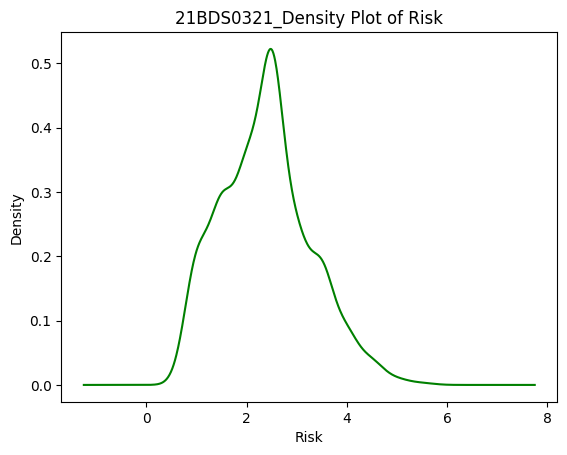

In [ ]:
# Density plot for risk
df_converted['risk'].plot(kind='kde', color='green')
plt.title('21BDS0321_Density Plot of Risk')
plt.xlabel('Risk')
plt.show()

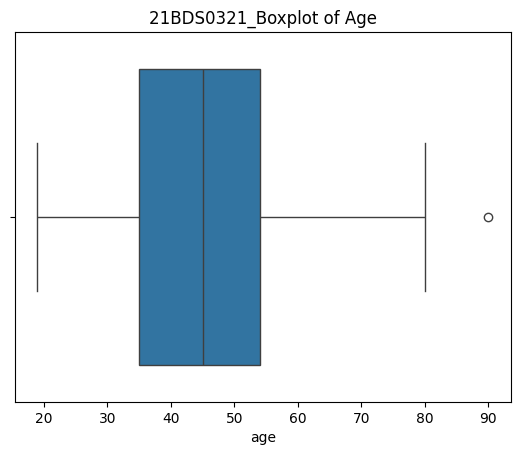

In [ ]:
# Boxplot for age
sns.boxplot(data=df_converted, x='age')
plt.title('21BDS0321_Boxplot of Age')
plt.show()

In [ ]:
# Bivariate analysis - Correlation between age and risk
bivariate_age_risk = df_converted[['age', 'risk']].corr()
bivariate_age_risk

,age,risk
age,1.000000,-0.216559
risk,-0.216559,1.000000


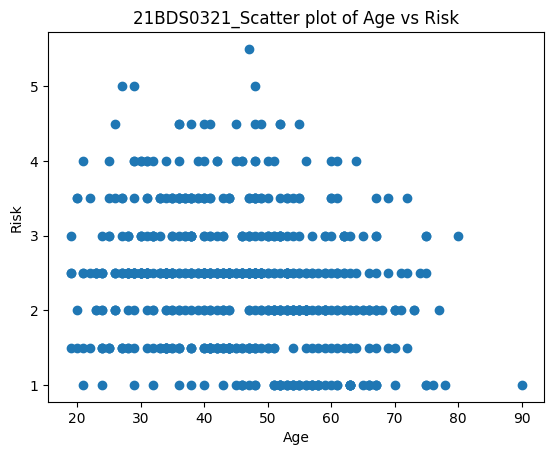

In [ ]:
# 2-D Analysis
# Scatter plot - age vs risk
plt.scatter(df_converted['age'], df_converted['risk'])
plt.xlabel('Age')
plt.ylabel('Risk')
plt.title('21BDS0321_Scatter plot of Age vs Risk')
plt.show()


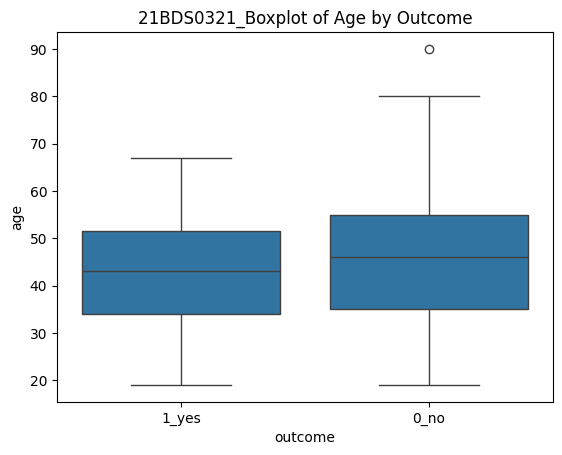

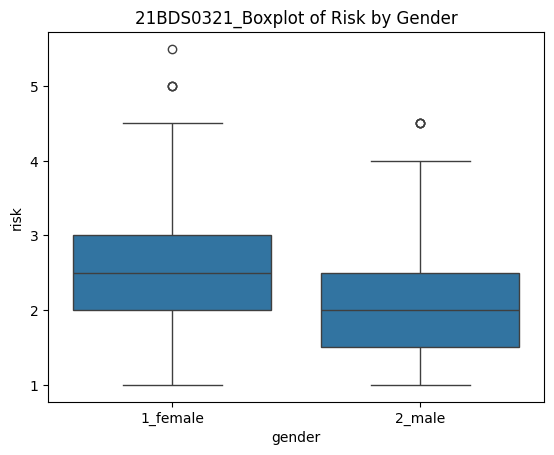

In [ ]:
# Boxplot of age vs outcome
sns.boxplot(data=data_deduplicated, x='outcome', y='age')
plt.title('21BDS0321_Boxplot of Age by Outcome')
plt.show()

# Boxplot of risk vs gender
sns.boxplot(data=data_deduplicated, x='gender', y='risk')
plt.title('21BDS0321_Boxplot of Risk by Gender')
plt.show()




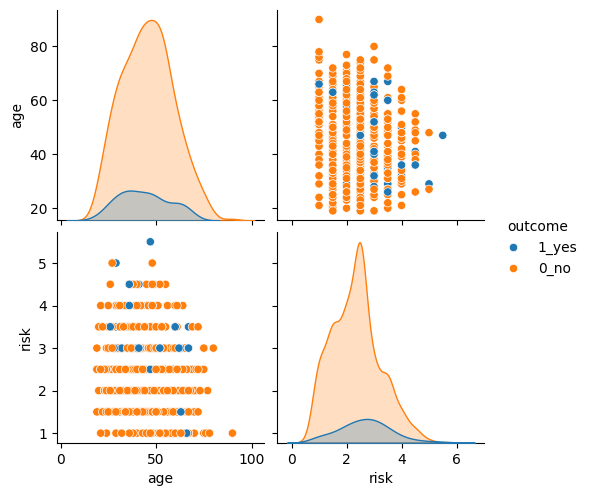

In [56]:
# 2-D Analysis
# Multivariate analysis - Pairplot for age, risk, and outcome
sns.pairplot(data_deduplicated[['age', 'risk', 'outcome']], hue='outcome')
plt.show()


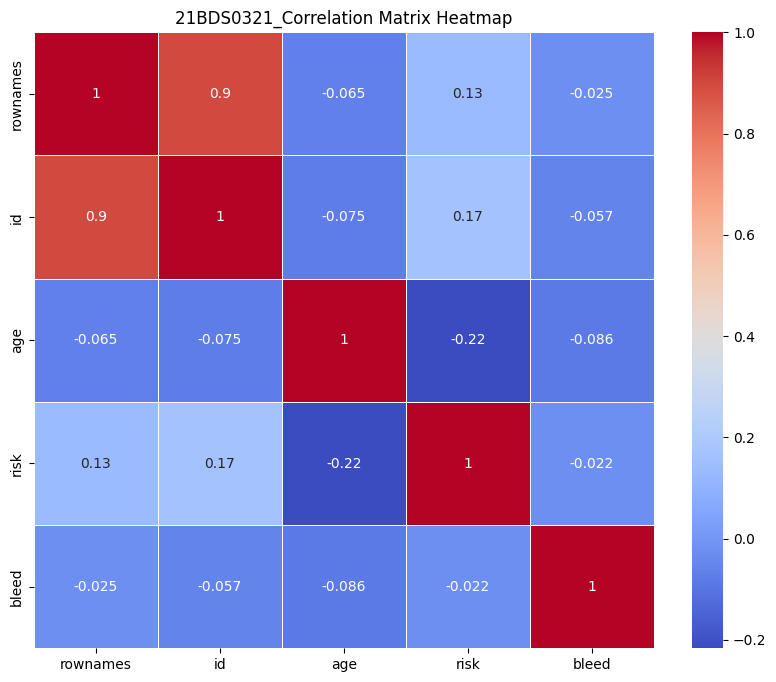

In [ ]:
# N-D Analysis
# Select only the numerical columns from the dataset
numerical_data = data_deduplicated.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for the numerical data
correlation_matrix = numerical_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('21BDS0321_Correlation Matrix Heatmap')
plt.show()


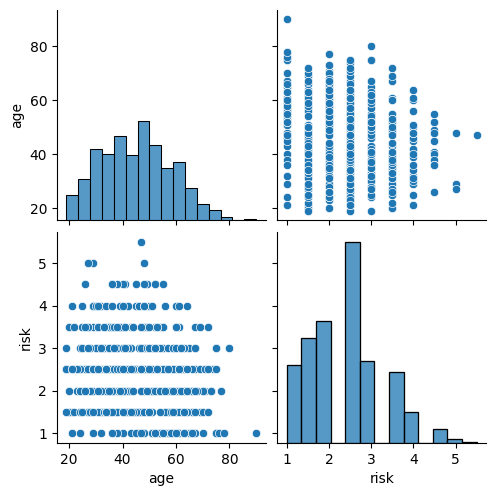

In [ ]:
# N-D Analysis
# Pairplot for age, risk, and outcome (without hue)
sns.pairplot(data_deduplicated[['age', 'risk', 'outcome']])
plt.show()

In [ ]:
# Summary statistics for 1D analysis (age)
summary_1d = data_deduplicated['age'].describe()
print(summary_1d)

# 2D analysis - Cross-tabulation for gender and outcome
contingency_table = pd.crosstab(data_deduplicated['gender'], data_deduplicated['outcome'])
print(contingency_table)



count    602.000000
mean      45.269103
std       13.297968
min       19.000000
25%       35.000000
50%       45.000000
75%       54.000000
max       90.000000
Name: age, dtype: float64
outcome   0_no  1_yes
gender               
1_female   413     63
2_male     110     16


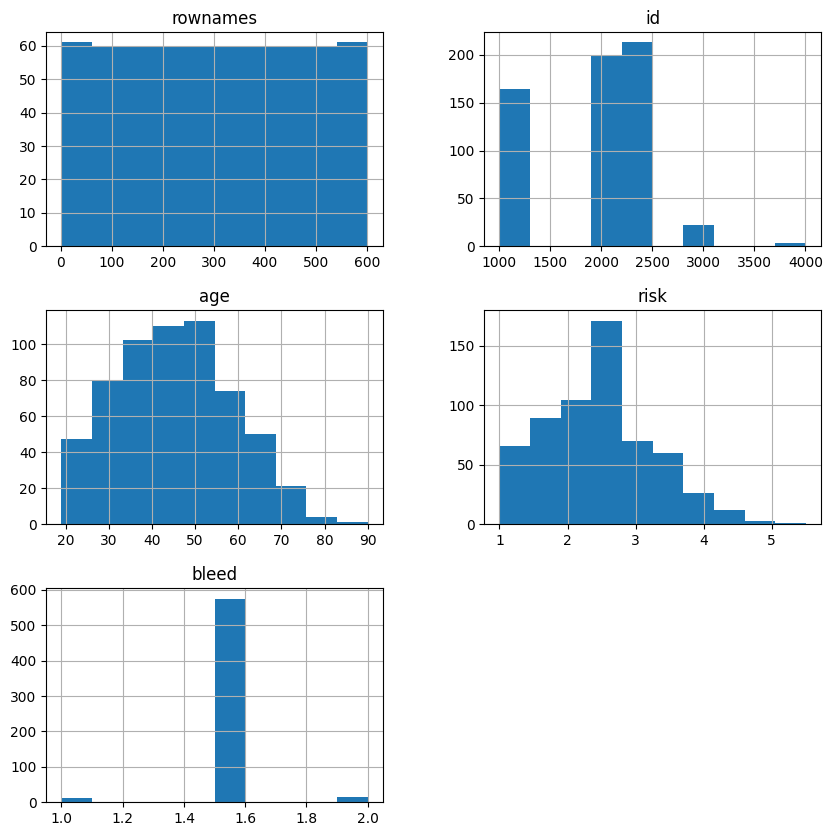

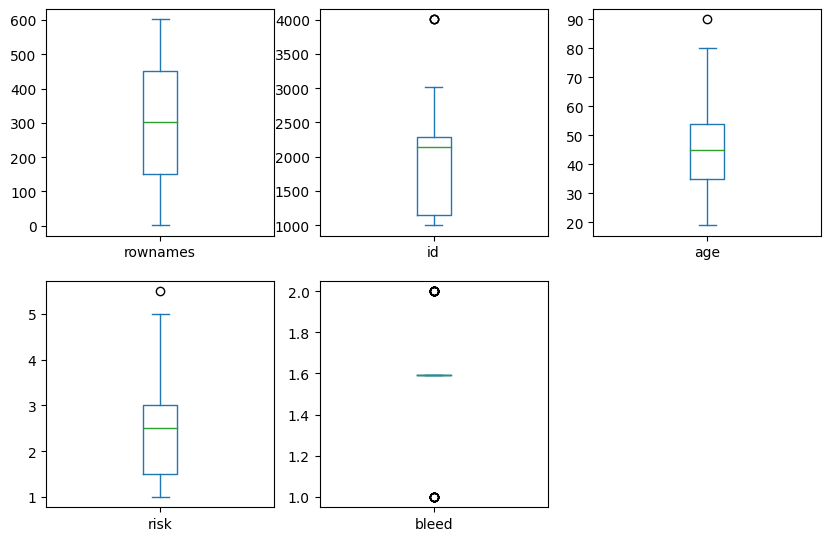

In [41]:
# 1-D Statistical Data Analysis
# Plotting histograms for all numeric columns
data_deduplicated.hist(figsize=(10, 10))
plt.show()

# Boxplot for visualizing dispersion
data_deduplicated.plot(kind='box', subplots=True, layout=(3, 3), figsize=(10, 10), sharex=False, sharey=False)
plt.show()

In [42]:

# Chi-square test for independence
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test statistic: {chi2}, p-value: {p}")


Chi-square test statistic: 0.0001071343657147233, p-value: 0.9917415849029003


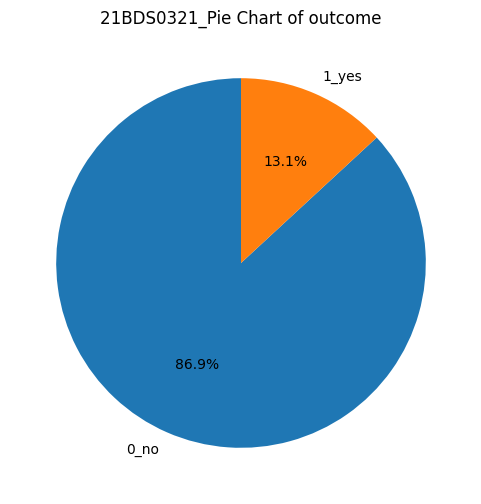

In [54]:
# Pie chart of a categorical variable (replace 'Category1' with actual column name)
data_deduplicated['outcome'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6, 6))
plt.title('21BDS0321_Pie Chart of outcome')
plt.ylabel('')  # Hide the y-label
plt.show()

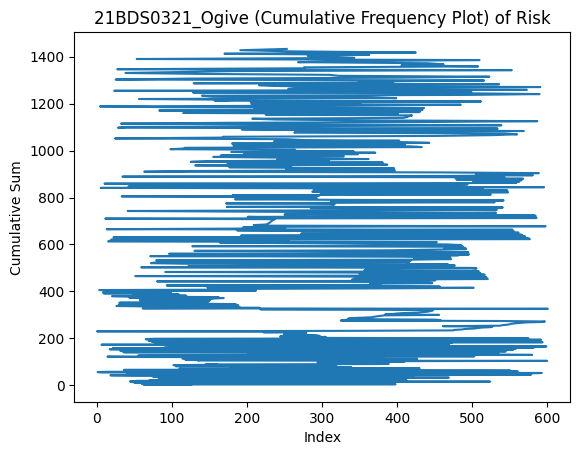

In [53]:
# Ogive for a numeric variable (replace 'Var1' with actual column name)
sorted_data = data_deduplicated['risk'].sort_values()
cumulative = sorted_data.cumsum()
plt.plot(cumulative.index, cumulative.values)
plt.title('21BDS0321_Ogive (Cumulative Frequency Plot) of Risk')
plt.xlabel('Index')
plt.ylabel('Cumulative Sum')
plt.show()


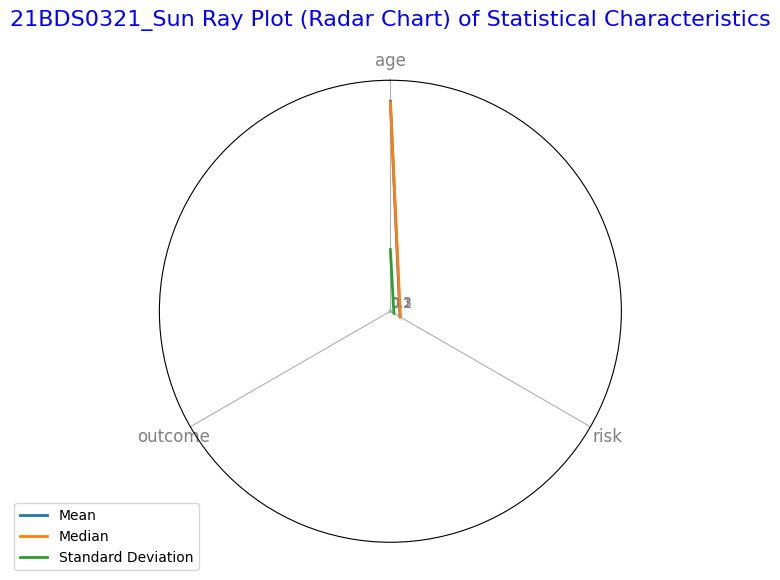

In [52]:
# 2-D Analysis
from math import pi

columns_to_analyze = ['age', 'risk', 'outcome']  # Replace these with your quantitative variables

# Calculate statistical characteristics (mean, median, std)
mean_vals =df_converted[columns_to_analyze].mean()
median_vals = df_converted[columns_to_analyze].median()
std_vals = df_converted[columns_to_analyze].std()

# Combine into a single dataframe for easy plotting
stats_df = pd.DataFrame({
    'Mean': mean_vals,
    'Median': median_vals,
    'Standard Deviation': std_vals
})

# Number of variables to plot
num_vars = len(stats_df)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the circle

# Radar chart setup
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# First axis goes on top (rotate the chart)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Labels for each variable
plt.xticks(angles[:-1], stats_df.index, color='grey', size=12)

# Draw y-labels
ax.set_rlabel_position(0)
plt.yticks([0.1, 0.2, 0.3], ["0.1", "0.2", "0.3"], color="grey", size=10)
plt.ylim(0, max(stats_df.max()) * 1.1)

# Plot each characteristic
for i, col in enumerate(stats_df.columns):
    values = stats_df[col].values.flatten().tolist()
    values += values[:1]  # Complete the circle
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=col)
    ax.fill(angles, values, alpha=0.25)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Title
plt.title('21BDS0321_Sun Ray Plot (Radar Chart) of Statistical Characteristics', size=16, color='blue', y=1.1)

plt.show()


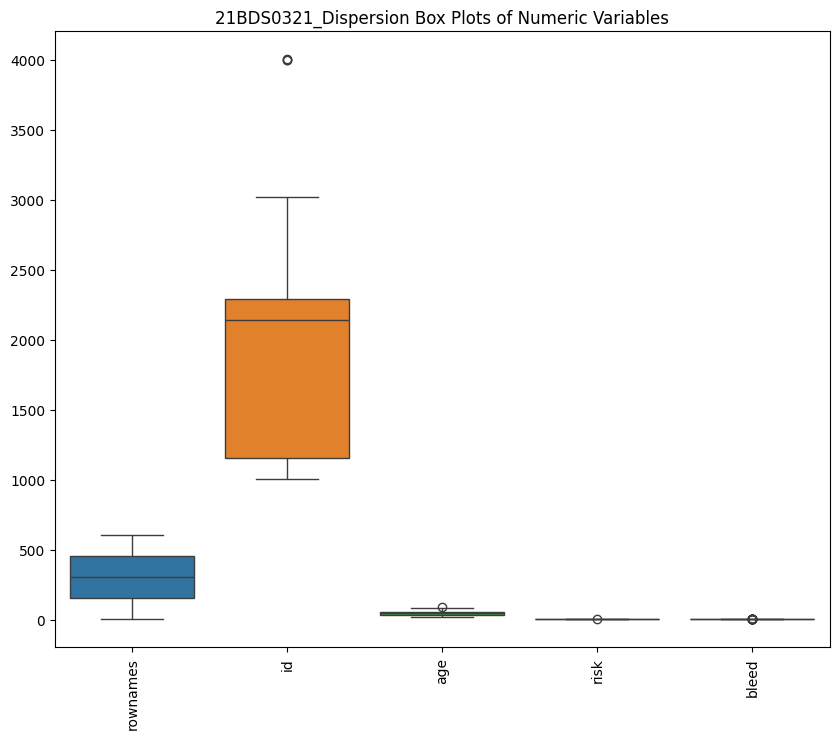

In [51]:
# N-D Analysis
# Plotting box plots for all numeric variables
plt.figure(figsize=(10, 8))
sns.boxplot(data=data_deduplicated)
plt.title('21BDS0321_Dispersion Box Plots of Numeric Variables')
plt.xticks(rotation=90)  # Rotate the x labels if necessary
plt.show()

In [50]:
import pandas as pd
import plotly.express as px

df1 = data_deduplicated[['age', 'risk', 'outcome']].dropna()  # Ensure no NaN values in the selected columns

# Create a ternary plot
fig = px.scatter_ternary(df1,
                         a='age',
                         b='risk',
                         c='outcome',
                         size_max=15,
                         title='21BDS0321_Ternary Plot (Triangular Diagram) of Age, Risk, and Outcome')

# Show the plot
fig.show()
